In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install huggingface_hub
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


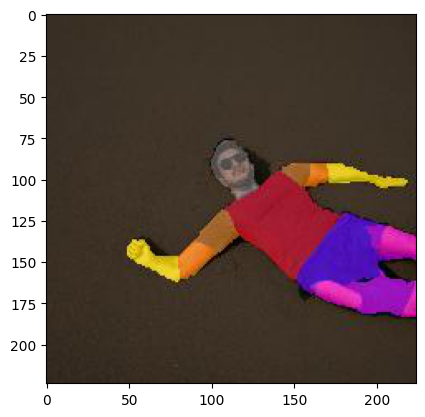

{'train': [{'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0ED86470>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0EBFDFC0>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0EBFE020>, 'label': 1}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0EC4FBB0>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0CB055A0>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0CB04B20>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0CB05600>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0CB048E0>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5B0CB04700>, 'label': 0}, {'img': <PIL.JpegImagePlugin.JpegImageFile image mode

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import csv

#generate data set
data_path = "/content/drive/MyDrive/566_project/data"
label_path = "/content/drive/MyDrive/566_project/labels"

label_name = "filtered_images_labels.csv"

#read labels
labels = {}
with open(label_path+'/'+label_name,encoding='utf-8', newline='') as csvfile:
        # 读取CSV文件内容
        csvreader = csv.reader(csvfile, delimiter=',')
        # 遍历CSV文件中的每一行
        for row in csvreader:
            labels[row[0]] = int(row[1])

ds = {'train':[],'val':[],'test':[]}

#read train_data
train_dir = data_path + '/' + 'train2'
train_images_files = [file for file in os.listdir(train_dir)]

for_test_flag = 0

for file_name in train_images_files:
  img = Image.open(os.path.join(train_dir, file_name))
  one_img = {}
  one_img['img'] = img
  one_img['label'] = labels[file_name.split('_')[0]]
  for_test_flag += 1
  if for_test_flag == 3:
    plt.imshow(one_img['img'])
    plt.show()
  ds['train'].append(one_img)

print(ds)


In [ ]:
print(len(ds['train']))

965


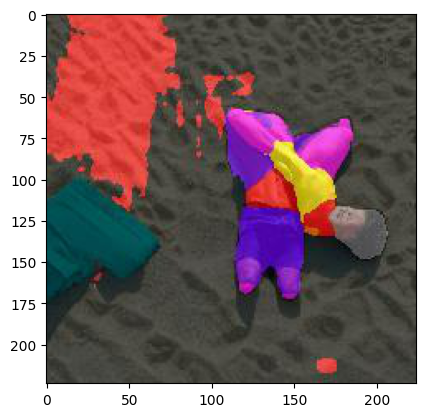

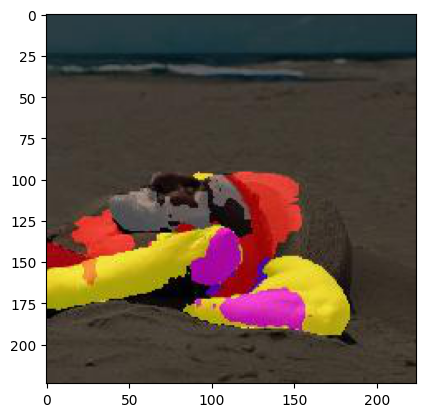

125
190


In [ ]:
#read val_data and test_data
val_dir = data_path + '/' + 'val2'
val_images_files = [file for file in os.listdir(val_dir)]

for_test_flag = 0

ds['val'] = []

for file_name in val_images_files:
  img = Image.open(os.path.join(val_dir, file_name))
  one_img = {}
  one_img['img'] = img
  one_img['label'] = labels[file_name.split('_')[0]]
  if for_test_flag == 0:
    for_test_flag = 1
    plt.imshow(img)
    plt.show()
  ds['val'].append(one_img)

test_dir = data_path + '/' + 'test2'
test_images_files = [file for file in os.listdir(test_dir)]

for_test_flag = 0

ds['test'] = []

for file_name in test_images_files:
  img = Image.open(os.path.join(test_dir, file_name))
  one_img = {}
  one_img['img'] = img
  one_img['label'] = labels[file_name.split('_')[0]]
  if for_test_flag == 0:
    for_test_flag = 1
    plt.imshow(img)
    plt.show()
  ds['test'].append(one_img)



print(len(ds['val']))
print(len(ds['test']))



In [ ]:
#import transformers
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
sample = feature_extractor(ds['train'][0]['img'], return_tensors='pt')

In [ ]:
print(sample)

{'pixel_values': tensor([[[[-0.5294, -0.5059, -0.5216,  ..., -0.6078, -0.6078, -0.6314],
          [-0.5137, -0.4902, -0.4980,  ..., -0.6706, -0.6627, -0.6706],
          [-0.5294, -0.5059, -0.5059,  ..., -0.7647, -0.7412, -0.7412],
          ...,
          [-0.6706, -0.6706, -0.6706,  ...,  0.4980,  0.5137,  0.5294],
          [-0.6157, -0.6314, -0.6392,  ...,  0.5059,  0.5294,  0.5608],
          [-0.6235, -0.6549, -0.6784,  ...,  0.4902,  0.5216,  0.5529]],

         [[-0.6235, -0.6000, -0.6157,  ..., -0.5843, -0.6000, -0.6235],
          [-0.6078, -0.5843, -0.5922,  ..., -0.6471, -0.6392, -0.6471],
          [-0.6235, -0.6000, -0.6000,  ..., -0.7255, -0.7020, -0.7020],
          ...,
          [-0.7412, -0.7412, -0.7412,  ..., -0.7804, -0.7725, -0.7725],
          [-0.6863, -0.7020, -0.7098,  ..., -0.7882, -0.7647, -0.7569],
          [-0.6941, -0.7255, -0.7490,  ..., -0.7804, -0.7490, -0.7255]],

         [[-0.7176, -0.6941, -0.7098,  ..., -0.6392, -0.6471, -0.6863],
          [-0

In [ ]:
print(sample['pixel_values'].shape)

torch.Size([1, 3, 224, 224])


In [ ]:
ds['train'][157]['label']

0

In [ ]:
prepared_ds = {'train':{},'val':{},'test':{}}

#test_data
test_labels = []
prepared_ds['test'] = feature_extractor([x['img'] for x in ds['test']], return_tensors='pt')

prepared_ds['test']['labels']=[x['label'] for x in ds['test']]

print(prepared_ds['test']['pixel_values'].shape)
print(len(prepared_ds['test']['labels']))




torch.Size([190, 3, 224, 224])
190


In [ ]:
#train_data
train_labels = []
prepared_ds['train'] = feature_extractor([x['img'] for x in ds['train']], return_tensors='pt')

prepared_ds['train']['labels']=[x['label'] for x in ds['train']]

#val_data
train_labels = []
prepared_ds['val'] = feature_extractor([x['img'] for x in ds['val']], return_tensors='pt')

prepared_ds['val']['labels']=[x['label'] for x in ds['val']]

print(prepared_ds['train']['pixel_values'].shape)
print(len(prepared_ds['train']['labels']))


print(prepared_ds['val']['pixel_values'].shape)
print(len(prepared_ds['val']['labels']))

torch.Size([965, 3, 224, 224])
965
torch.Size([125, 3, 224, 224])
125


In [ ]:
"""
class Myds(torch.utils.data.Dataset):
  def __init__(self, data, labels):
    self.data = data
    self.labels = labels
  def __len__(self):
    return len(self.labels)
  def __getitem__(self, idx):
      item = self.data[idx].squeeze()
      return item,self.labels[idx]
"""

'\nclass Myds(torch.utils.data.Dataset):\n  def __init__(self, data, labels):\n    self.data = data\n    self.labels = labels\n  def __len__(self):\n    return len(self.labels)\n  def __getitem__(self, idx):\n      item = self.data[idx].squeeze()\n      return item,self.labels[idx]\n'

In [ ]:
#version2 
class Myds(torch.utils.data.Dataset):
  def __init__(self, data):
    self.data = data
  def __len__(self):
    return len(self.data['labels'])
  def __getitem__(self, idx):
      item = self.data['pixel_values'][idx].squeeze()
      return {
        'pixel_values': item,
        'labels':self.data['labels'][idx]
    }

In [ ]:
##version1
"""
myds = {}
myds['train'] = Myds(prepared_ds['train']['pixel_values'],prepared_ds['train']['labels'])
myds['val'] = Myds(prepared_ds['val']['pixel_values'],prepared_ds['val']['labels'])
myds['test'] = Myds(prepared_ds['test']['pixel_values'],prepared_ds['test']['labels'])
"""

"\nmyds = {}\nmyds['train'] = Myds(prepared_ds['train']['pixel_values'],prepared_ds['train']['labels'])\nmyds['val'] = Myds(prepared_ds['val']['pixel_values'],prepared_ds['val']['labels'])\nmyds['test'] = Myds(prepared_ds['test']['pixel_values'],prepared_ds['test']['labels'])\n"

In [ ]:
##version2 
myds = {}
myds['train'] = Myds(prepared_ds['train'])
myds['val'] = Myds(prepared_ds['val'])
myds['test'] = Myds(prepared_ds['test'])

In [ ]:
#define model
#version1
"""def collate_fn(batch):
  return torch.stack([x for x,_ in batch]),torch.tensor([x for _,x in batch])"""


'def collate_fn(batch):\n  return torch.stack([x for x,_ in batch]),torch.tensor([x for _,x in batch])'

In [ ]:
#version2
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-20-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
from transformers import ViTForImageClassification

labels = ['bad','good']

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="/content/drive/MyDrive/566_project/output",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=20,
  eval_steps=20,
  logging_steps=10,
  learning_rate=2e-5,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=myds["train"],
    eval_dataset=myds["val"],
    tokenizer=feature_extractor,
)

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
20,0.606200,0.606544,0.632000
40,0.538100,0.535674,0.784000
60,0.579800,0.488475,0.808000
80,0.405100,0.452231,0.816000
100,0.467800,0.429404,0.832000
120,0.407700,0.396356,0.824000
140,0.325700,0.381295,0.824000
160,0.309600,0.361815,0.832000
180,0.288600,0.354236,0.840000
200,0.221200,0.348060,0.848000


***** train metrics *****
  epoch                    =         4.0
  total_flos               = 278576351GF
  train_loss               =       0.385
  train_runtime            =  0:02:23.03
  train_samples_per_second =      26.987
  train_steps_per_second   =       1.706


In [ ]:
metrics = trainer.evaluate(myds['test'])
trainer.log_metrics("test", metrics)
trainer.save_metrics("test", metrics)

***** test metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.8526
  eval_loss               =     0.3664
  eval_runtime            = 0:00:01.12
  eval_samples_per_second =    168.515
  eval_steps_per_second   =     21.286


metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)